# Lung Squamous Cell Carcinoma (LUSC)
[Jump to the urls to download the GCT and CLS files](#Downloads)

**Authors:** Alejandra Ramos, Marylu Villa and Edwin Juarez 
**Is this what you want your scientific identity to be?**  
**Contact info:** Email Edwin at [ejuarez@cloud.ucsd.edu](mailto:ejuarez@cloud.ucsd.edu) or post a question in http://www.genepattern.org/help

This notebook provides the steps to download all the LUSC samples from The Cancer Genome Atlas (TCGA) contained in the Genomic Data Commons (GDC) Data portal. These samples can be downloaded as a GCT file and phenotype labels (primary tumor vs normal samples) can be downloaded as a CLS file. These files are compatible with other GenePattern Analyses.

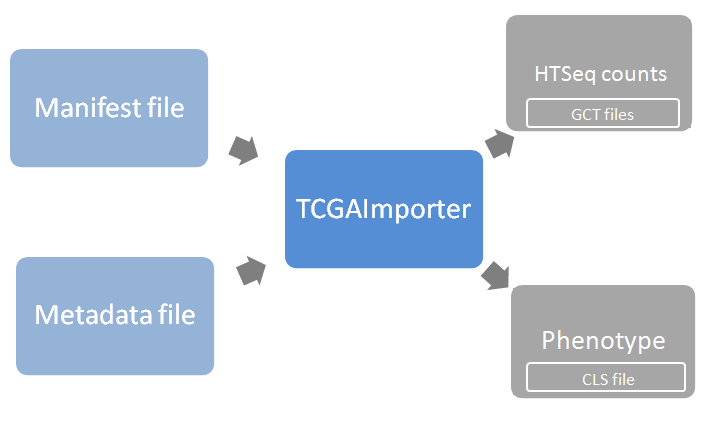

# Overview


<p>LUSC is a&nbsp; type of lung cancer. It occurs when abnormal lung cells multiply out of control and form a tumor. Eventually, tumor cells can spread (metastasize) to other parts of the body including the: lymph nodes around and between the lungs, liver,bones, adrenal glands,&nbsp;brain.</p>

<p>&nbsp;</p>


<p><img alt="Resultado de imagen para Lung Squamous Cell Carcinoma" src="https://lungevity.org/sites/default/files/illustrations/squamous-histology-063015.png" /></p>


# LUSC Statistics

<p>Lung squamous cell carcinoma is a common type of lung cancer, causing approximately 400,000 deaths per year worldwide. Genomic alterations in squamous cell lung cancers have not been comprehensively characterized, and no molecularly targeted agents have been specifically developed for its treatment. As part of The Cancer Genome Atlas, here we profile 178 lung squamous cell carcinomas to provide a comprehensive landscape of genomic and epigenomic alterations.</p>


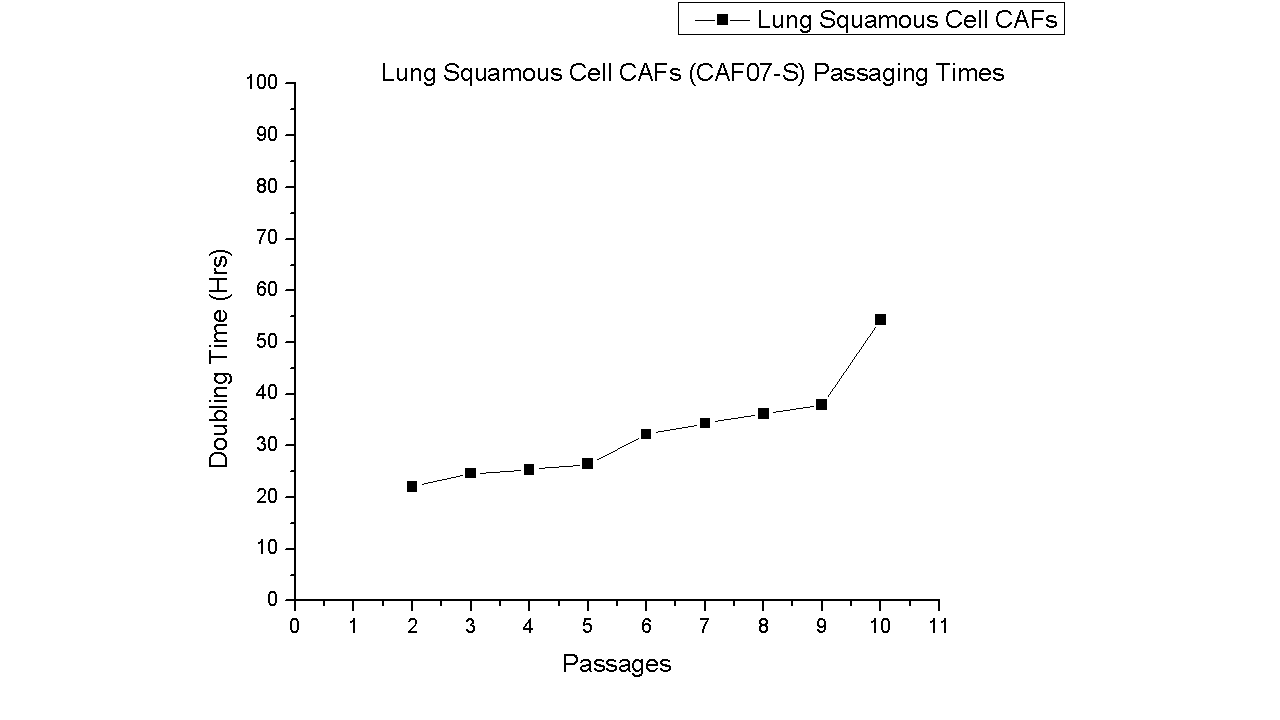
https://www.google.com/search?q=Lung+squamous+cell+carcinoma&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjvkovlypXcAhUMJHwKHawuB6YQ_AUICigB&biw=1600&bih=767#imgrc=WTZWIqYwmEcwYM:

# Dataset's Demographic information


<p>TCGA contained 550 LUSC&nbsp;samples (501&nbsp;primary cancer samples, and 49&nbsp;normal tissue samples) from 501&nbsp;people. Below is a summary of the demographic information represented in this dataset. If you are interested in viewing the complete study, as well as the files on the GDC Data Portal, you can follow&nbsp;<a href="https://portal.gdc.cancer.gov/repository?facetTab=cases&amp;filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.project.project_id%22%2C%22value%22%3A%5B%22TCGA-UVM%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.analysis.workflow_type%22%2C%22value%22%3A%5B%22HTSeq%20-%20Counts%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.experimental_strategy%22%2C%22value%22%3A%5B%22RNA-Seq%22%5D%7D%7D%5D%7D&amp;searchTableTab=cases" target="_blank">this link.(these data were gathered on July 10th, 2018)</a></p>


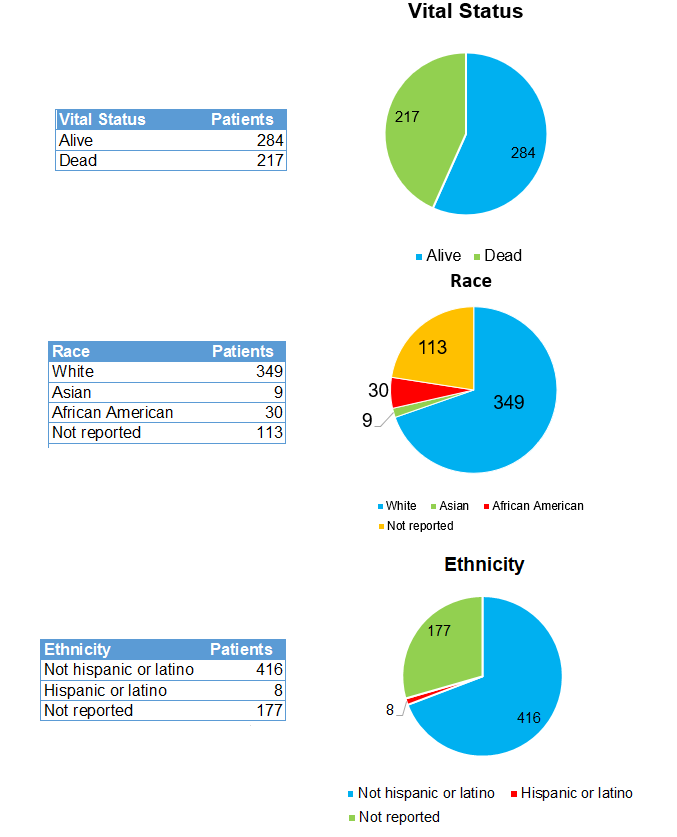

# Login to GenePattern


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Login to the *GenePattern Cloud* server.</li>
</ol>

</div>

In [12]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://gp-beta-ami.genepattern.org/gp", "", ""))

GPAuthWidget()

# Downloading RNA-Seq HTSeq Counts Using TCGAImporter

Use the TCGAImporter module to download RNA-Seq HTSeq counts from the GDC Data Portal using a Manifest file and a Metadata file

<p><strong>Input files</strong></p>

<ul>
	<li><em>Manifest file</em>: a file containing the list of RNA-Seq samples to be downloaded.</li>
	<li><em>Metadata file</em>: a file containing information about the files present at the GDC Data Portal. Instructions for downloading the Manifest and Metadata files can be found here: <a href="https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf" target="_blank">https://github.com/genepattern/TCGAImporter/blob/master/how_to_download_a_manifest_and_metadata.pdf</a></li>
</ul>

<p><strong>Output files</strong></p>

<ul>
	<li><em>LUSC_TCGA.gct</em> - This is a tab delimited file that contains the gene expression&nbsp;(HTSeq&nbsp;counts) from the samples listed on the Manifest file. For more info on GCT files, look at reference <a href="#References">1</a><em> </em></li>
	<li><em><em>LUSC_TCGA.cls</em> -</em> The CLS file defines phenotype labels (in this case Primary Tumor and Normal Sample) and associates each sample in the GCT file with a label. For more info on CLS files, look at reference <a href="#References">2</a></li>
</ul>


<div class="alert alert-info">
<h3 style="margin-top: 0;"> Instructions <i class="fa fa-info-circle"></i></h3>

<ol>
    <li>Load the manifest file in **Manifest** parameter.</li>
    <li>Load the metadata file in **Metadata** parameter.</li>
    <li>Click **run**.</li>
</ol>

</div>

<p><strong>Estimated run time for TCGAImporter</strong> : ~ 10 minutes</p>


In [13]:
tcgaimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')
tcgaimporter_job_spec = tcgaimporter_task.make_job_spec()
tcgaimporter_job_spec.set_parameter("manifest", "https://cloud.genepattern.org/gp/users/marylu257/tmp/run7272015200385915205.tmp/LUSC_manifest.txt")
tcgaimporter_job_spec.set_parameter("metadata", "https://cloud.genepattern.org/gp/users/marylu257/tmp/run4385458952093550330.tmp/LUSC_metadata.json")
tcgaimporter_job_spec.set_parameter("output_file_name", "LUSC_TCGA")
tcgaimporter_job_spec.set_parameter("gct", "True")
tcgaimporter_job_spec.set_parameter("translate_gene_id", "False")
tcgaimporter_job_spec.set_parameter("cls", "True")
genepattern.display(tcgaimporter_task)

job35227 = gp.GPJob(genepattern.session.get(0), 35227)
genepattern.display(job35227)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00369')

GPJobWidget(job_number=31612)

In [14]:
collapsedataset_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134')
collapsedataset_job_spec = collapsedataset_task.make_job_spec()
collapsedataset_job_spec.set_parameter("dataset.file", "https://cloud.genepattern.org/gp/jobResults/31612/TCGA_dataset.gct")
collapsedataset_job_spec.set_parameter("chip.platform", "ftp://ftp.broadinstitute.org/pub/gsea/annotations/ENSEMBL_human_gene.chip")
collapsedataset_job_spec.set_parameter("collapse.mode", "Maximum")
collapsedataset_job_spec.set_parameter("output.file.name", "<dataset.file_basename>.collapsed")
genepattern.display(collapsedataset_task)


job32414 = gp.GPJob(genepattern.session.get(0), 32414)
genepattern.display(job32414)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00134')

GPJobWidget(job_number=32414)

# Downloads


<p>You can download the input and output files of TCGAImporter for this cancer type here:</p>

<p><strong>Inputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_MANIFEST.txt" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/LUSC/LUSC_MANIFEST.txt</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_METADATA.json" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/LUSC/LUSC_METADATA.json</a></li>
</ul>

<p><strong>Outputs:</strong></p>

<ul>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.gct" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/LUSC/LUSC_TCGA.gct</a></li>
	<li><a href="https://datasets.genepattern.org/data/TCGA_HTSeq_counts/KIRP/KIRP_TCGA.cls" target="_blank">https://datasets.genepattern.org/data/TCGA_HTSeq_counts/LUSC/LUSC_TCGA.cls</a></li>
</ul>


If you'd like to download similar files for other TCGA datasets, visit this link: 
- https://datasets.genepattern.org/?prefix=data/TCGA_HTSeq_counts/

# References

[1] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT

[2] http://software.broadinstitute.org/cancer/software/genepattern/file-formats-guide#CLS

[3] <a href="https://www.nature.com/articles/nature11404 &amp;nbsp" target="_blank">https://www.nature.com/articles/nature11404&nbsp;&amp;nbsp</a>;</p>

[4] <a href="https://www.spiedigitallibrary.org/conference-proceedings-of-spie/10581/1058119/Classification-of-lung-cancer-histology-images-using-patch-level-summary/10.1117/12.2293855.full?SSO=1" target="_blank">https://www.spiedigitallibrary.org/conference-proceedings-of-spie/10581/1058119/Classification-of-lung-cancer-histology-images-using-patch-level-summary/10.1117/12.2293855.full?SSO=1</a></p>

[5] https://www.google.com/search?biw=1366&amp;bih=635&amp;tbm=isch&amp;sa=1&amp;ei=QFM-W9XEC4LP8AOy05GQDw&amp;q=Lung+Squamous+Cell+Carcinoma&amp;oq=Lung+Squamous+Cell+Carcinoma&amp;gs_l=img.3..0i19k1l3j0i30i19k1j0i8i30i19k1l6.9849.10166.0.10814.2.2.0.0.0.0.87.87.1.1.0....0...1c.1.64.img..1.1.86.0...0.GWysBwRaacE#imgrc=Dqb2SRxWDKjpEM:</p>
